## Equation of states graph

Calculate the equation of states graph for Si cd

In [1]:
from ase.build import bulk
import aiWT
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import h5py 
file = h5py.File("/home/vale/Documents/DFTPY/aiWT/Phases/organize_data/data.hdf5", 'r') 
X = file["Descriptor"] 
Y = file["rho0"]
file.close

<bound method File.close of <HDF5 file "data.hdf5" (mode r)>>

In [3]:
ions = bulk('Si', 'diamond', a=5.43, cubic=True) 
aiwt=aiWT.airho0(ions=ions,X=X,Y=Y,nat=65,ns=150) # initialize the machine learning fitting

In [4]:
path_pp='/home/vale/Documents/DFTPY/aiWT/dftpy/examples/DATA/ofpp-main/EAC/upf/blps/'
file='si.lda.upf'
PP_list = {'Si': path_pp+file}

toten = []
volume = []
Rho0 = []
Ke = []
for i, d in enumerate(np.linspace(0.8, 1.4, 30)):
    print(d)
    ions = bulk('Si', 'diamond', a=5.43, cubic=True)
    cell = ions.get_cell()
    ions.set_cell(cell * d, scale_atoms=True) 
    rho0, ke, Total_energy = aiWT.airho0.get_energy(ions=ions, PP_list=PP_list, aiwt=aiwt) # predict rho0 and calculate the total energy with the aiWT KEDF
    toten.append(Total_energy)
    volume.append(ions.get_volume())
    Rho0.append(rho0)
    Ke.append(ke)

0.8
setting key: Si -> /home/vale/Documents/DFTPY/aiWT/dftpy/examples/DATA/ofpp-main/EAC/upf/blps/si.lda.upf


Step    Energy(a.u.)            dE              dP              Nd      Nls     Time(s)         
0       -2.757753846586E+01     -2.757754E+01   9.443759E+00    1       1       1.732588E-02    
1       -3.099883272305E+01     -3.421294E+00   4.587006E-01    10      2       1.148400E-01    
2       -3.102551099753E+01     -2.667827E-02   2.940628E-02    4       1       1.651757E-01    
3       -3.102837159094E+01     -2.860593E-03   2.765256E-03    5       1       1.984363E-01    
4       -3.102872131688E+01     -3.497259E-04   1.899023E-04    7       1       2.217894E-01    
5       -3.102873276469E+01     -1.144782E-05   1.505173E-05    4       1       2.369161E-01    
6       -3.102873431596E+01     -1.551268E-06   1.316454E-06    6       1       2.570059E-01    
#### Density Optimization Converged ####
Chemical potential (a.u.): 0.5402203623959683
Chemical potential (eV)  : 14.700144819380258
Volume =  553.1794672152279
Kinetic energy (Ha)=  16.23615110127869
Total energy (Ha) =  -3

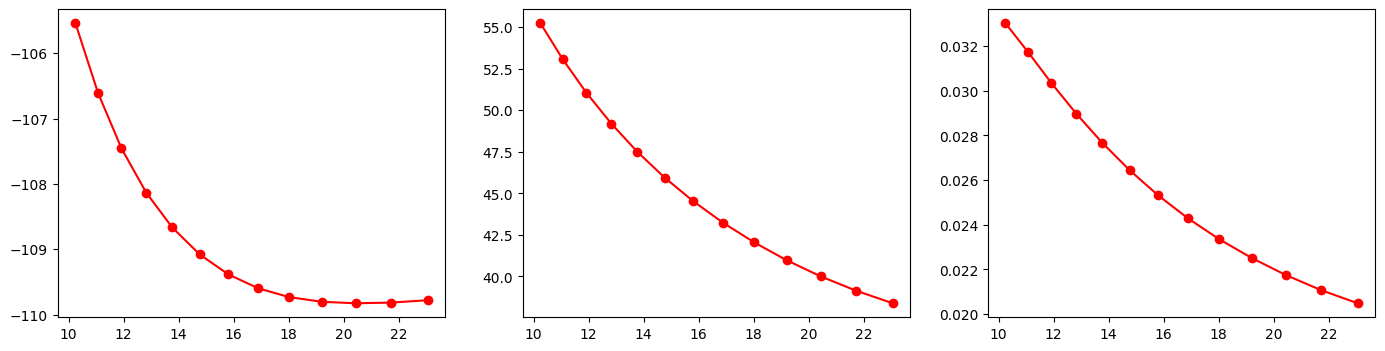

In [7]:
fig, axs = plt.subplots(1,3, figsize=(17,4))
axs[0].plot(np.asarray(volume[0:13])/8,np.asarray(toten[0:13])*27.211407/8, 'o-', color='red', label='Total energy')
axs[1].plot(np.asarray(volume[0:13])/8,np.asarray(Ke[0:13])*27.211407/8, 'o-', color='red', label='Kinetic energy')
axs[2].plot(np.asarray(volume[0:13])/8,np.asarray(Rho0[0:13]), 'o-', color='red', label='rho0')
axs[0].xlabel(['Volume ($\AA^{3}$/atom)'])
axs[0].ylabel(['Total energy (eV/atom))'])

axs[1].xlabel(['Volume ($\AA^{3}$/atom)'])
axs[1].ylabel(['Total energy (eV/atom))'])

axs[2].xlabel(['Volume ($\AA^{3}$/atom)'])
axs[2].ylabel(['Total energy (eV/atom))'])